<a href="https://colab.research.google.com/github/doeungim/ADP_DE2/blob/main/ADP_PRAC_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [3]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ADP_SONY/ADP_SET_1/data/bitcoin_mock.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### ‚úÖ  1. Î™®Îì† Îç∞Ïù¥ÌÑ∞ ÌñâÏù¥ 1Î∂ÑÍ∞ÑÍ≤©ÏúºÎ°ú Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏ÌïòÍ≥† Í∑∏Î†áÏßÄ ÏïäÏùÄ Í≤ΩÏö∞ ÎàÑÎùΩÎêú ÏãúÍ∞ÅÏùò ÌñâÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ïª¨ÎüºÎì§Ïùò Í≤∞Ï∏°ÏπòÎ•º Ï†ÅÏ†àÌûà ÏÉùÏÑ±ÌïòÎùº. Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨ÌïúÎã§Î©¥ Í≤∞Ï∏°ÏπòÎ•º Ï≤òÎ¶¨ÌïòÎùº

In [45]:
df['datetime'] = pd.to_datetime(df['datetime'])

# 60Ï¥à = 1Î∂Ñ Í∞ÑÍ≤©ÏúºÎ°ú ÌôïÏù∏
df['diff']= df['datetime'].diff(1).dt.seconds


print(df['diff'].value_counts())
# 120 Í∞ÑÍ≤© ÌôïÏù∏
#Í∑∏Î†áÏßÄ ÏïäÏùÄ Í≤ΩÏö∞ ÎàÑÎùΩÎêú ÏãúÍ∞ÅÏùò ÌñâÏùÑ ÏÉùÏÑ±
# 1Î∂Ñ Í∞ÑÍ≤©Ïùò Îç∞Ïù¥ÌÑ∞ RangeÎ°ú ÏÉùÏÑ±
min = df['datetime'].min()
max = df['datetime'].max()

new_date = pd.DataFrame(pd.date_range(start = min, end = max, freq = '1T') , columns = ['new_date'])

total = pd.merge(new_date, df, how = 'left', left_on = 'new_date', right_on = 'datetime')

# total['new_date'].diff(1).dt.seconds.value_counts()

total = total.drop(columns = ['datetime','diff'])

# Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨ÌïúÎã§Î©¥ Í≤∞Ï∏°ÏπòÎ•º Ï≤òÎ¶¨
total= total.interpolate().reset_index(drop = True)

diff
60.0     613102
120.0        25
Name: count, dtype: int64


<ipython-input-45-4591efb21532>:14: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  new_date = pd.DataFrame(pd.date_range(start = min, end = max, freq = '1T') , columns = ['new_date'])


#### ‚úÖ  2. Ï†ÑÏ≤òÎ¶¨

      1. t(Î∂Ñ)ÏãúÏ†êÏóêÏÑú close Í∞íÏóê ÎåÄÌïú t(Î∂Ñ)ÏãúÏ†êÏùò 5Î∂Ñ,120Î∂Ñ Ïù¥ÎèôÌèâÍ∑†Í∞íÏùÑ Í∞ÅÍ∞Å 't_5', 't_120'ÏúºÎ°ú Ïª¨ÎüºÏúºÎ°ú t-1(Î∂Ñ)ÏãúÏ†êÏùò 5Î∂Ñ,120Î∂Ñ Ïù¥ÎèôÌèâÍ∑†Í∞íÏùÑ Í∞ÅÍ∞Å 't-1_5', 't-1_120'ÏúºÎ°ú Ïª¨Îüº

      2. t(Î∂Ñ)ÏãúÏ†êÏóêÏÑú 5Î∂Ñ Ïù¥ÎèôÌèâÍ∑†Í∞í(t_5)ÏùÄ 120Î∂Ñ Ïù¥ÎèôÌèâÍ∑†Í∞í(t_120)Î≥¥Îã§ ÎÜíÍ≥† t-1Ïùò 5Î∂Ñ Ïù¥ÎèôÌèâÍ∑†Í∞í(t-1_5)ÏùÄ 120Î∂Ñ Ïù¥ÎèôÌèâÍ∑†Í∞í(t-1_120)Î≥¥Îã§ ÎÇÆÏùÄ Í≤ΩÏö∞ : 'buy' # Îß§Ïàò
      t(Î∂Ñ)ÏãúÏ†êÏóêÏÑú 5Î∂Ñ Ïù¥ÎèôÌèâÍ∑†Í∞í(t_5)ÏùÄ 120Î∂Ñ Ïù¥ÎèôÌèâÍ∑†Í∞í(t_120 Î≥¥Îã§ ÎÇÆÍ≥† t-1Ïùò 5Î∂Ñ Ïù¥ÎèôÌèâÍ∑†Í∞í(t-1_5)ÏùÄ 120Î∂Ñ Ïù¥ÎèôÌèâÍ∑†Í∞í(t-1_120)Î≥¥Îã§ ÎÜíÏùÄ Í≤ΩÏö∞ : 'sell' # Îß§ÎèÑ
      Í∑∏Ïô∏ 'stay'  ÏúÑÏùò Ï°∞Í±¥ÏúºÎ°ú buy(Îß§Ïàò), sell(Îß§ÎèÑ)Î•º ÌåêÎã®ÌïòÍ≥† buy,sell,stayÎ•º ÎÇòÌÉÄÎÇ¥Îäî ÏÉàÎ°úÏö¥ Ïª¨Îüº 'algorithm'ÏùÑ ÏÉùÏÑ±

      3. t+10(Î∂Ñ)Ïùò open Í∞íÍ≥º t(Î∂Ñ)Ïùò closeÍ∞íÏùÑ ÎπÑÍµêÌïòÏó¨ ÏÉàÎ°úÏö¥ Ïª¨Îüº 'result'Î•º ÎßåÎì†Îã§.

      Ïó¨Î∂ÄÍ∞Ä 'buy' Ïù¥Í≥† t+10(Î∂Ñ) open >= t(Î∂Ñ) close : 'profit'
      Ïó¨Î∂ÄÍ∞Ä 'buy' Ïù¥Í≥† t+10(Î∂Ñ) open < t(Î∂Ñ) close : 'loss'
      Ïó¨Î∂ÄÍ∞Ä 'sell' Ïù¥Í≥† t+10(Î∂Ñ) open >= t(Î∂Ñ) close : 'loss'
      Ïó¨Î∂ÄÍ∞Ä 'sell' Ïù¥Í≥† t+10(Î∂Ñ) open < t(Î∂Ñ) close : 'profit'
      Ïó¨Î∂ÄÍ∞Ä 'stay' Ïù¥Î©¥ : 'stay'

In [53]:
total['t_5'] = total['close'].rolling(5).mean()
total['t_120'] = total['close'].rolling(120).mean()

# t-1(Î∂Ñ)ÏãúÏ†êÏùò 5Î∂Ñ,120Î∂Ñ Ïù¥ÎèôÌèâÍ∑†Í∞íÏùÑ Í∞ÅÍ∞Å 't-1_5', 't-1_120'
total['t_1_5'] = total['t_5'].shift(1)
total['t_1_120'] = total['t_120'].shift(1)


In [64]:
# 2.
def algo(x) :
  t_5 = x['t_5']
  t_120 = x['t_120']
  t_1_5 = x['t_1_5']
  t_1_120 = x['t_1_120']

  if t_5 > t_120 and t_1_5 < t_1_120 :
    return 'buy'
  elif t_5 < t_120 and t_1_5 > t_1_120 :
    return 'sell'
  else :
    return 'stay'

total['algorithm'] = total.apply(algo, axis = 1)
total['algorithm'].value_counts()

algorithm
stay    598515
sell      7319
buy       7319
Name: count, dtype: int64

In [65]:
# 3.
total['t_10'] = total['open'].shift(-10)

def result(x) :
  algo = x['algorithm']
  t_10 = x['t_10']
  close = x['close']

  if algo =='buy' :
    if t_10 >= close :
      return 'profit'
    elif t_10 < close :
      return 'loss'

  elif algo =='sell' :
    if t_10 >= close :
      return 'loss'
    elif t_10 < close :
      return 'profit'

  elif algo == 'stay' :
    return 'stay'

total['result'] = total.apply(result, axis = 1)

#### ‚úÖ  3. Plot
    2022-01-01 08:00:00 ~ 2022-01-01 15:00:00 ÏãúÍ∞ÑÎåÄÏùò closeÍ∞íÏùò ÏÑ†Ìòï Í∑∏ÎûòÌîÑ
    ÏúÑ ÏãúÍ∞ÑÎåÄÏóê ÎåÄÌï¥ algorithm Ïª¨ÎüºÏù¥ buyÏùº Í≤ΩÏö∞ Îπ®Í∞Ñ ÏàòÏßÅÏÑ†, sellÏùº Í≤ΩÏö∞ ÌååÎûÄ ÏàòÏßÅÏÑ†

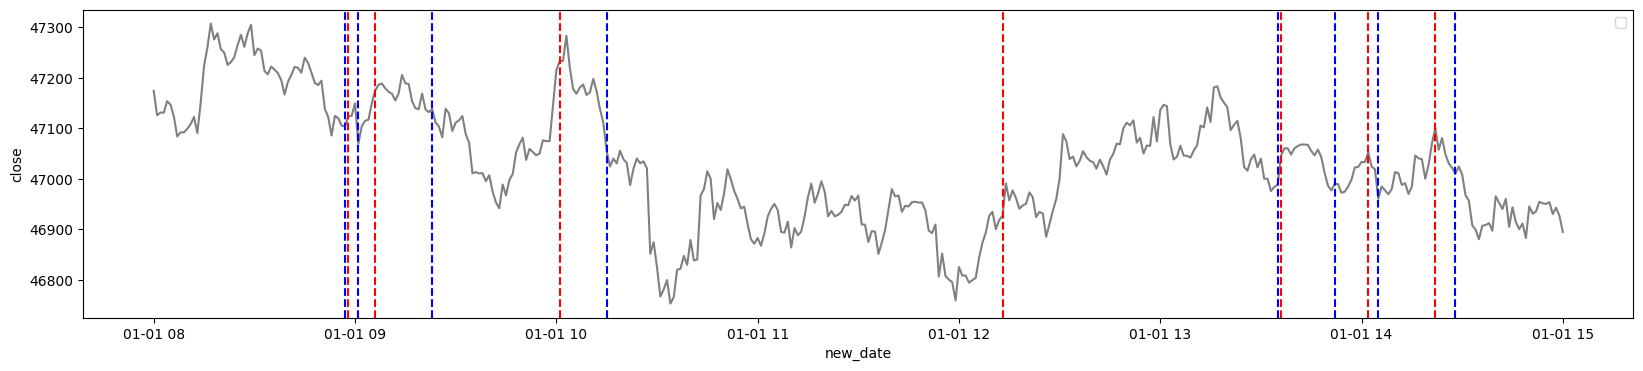

In [106]:
t2 = total.dropna()

start = pd.to_datetime('2022-01-01 08:00:00 ')
end = pd.to_datetime('2022-01-01 15:00:00')

plot_df = t2.loc[(t2['new_date'] >= start) & (t2['new_date'] <= end)].reset_index(drop = True)

plt.figure(figsize = (20, 4))

sns.lineplot(x = 'new_date', y = 'close', data = plot_df , color = 'grey')


for i in range(len(plot_df)) :
  if plot_df['algorithm'].iloc[i] == 'buy' :
    plt.axvline(x = plot_df['new_date'].iloc[i], color = 'red', linestyle= '--')

  elif plot_df['algorithm'].iloc[i] == 'sell' :
    plt.axvline(x = plot_df['new_date'].iloc[i], color = 'blue', linestyle= '--')

plt.legend()
plt.show()

In [107]:
# np.where : Ï°∞Í±¥ ÎßåÏ°± Ïù∏Îç±Ïä§Î°úÎßå Î∞òÌôò
plot_df.iloc[np.where(plot_df['algorithm'].isin(['buy', 'sell']))][['algorithm','close']]

# Filter : Ïª¨ÎüºÏùÑ ÌïÑÌÑ∞ÎßÅÌïòÎäî Ìï®Ïàò
# 'apple'Í≥º 'cherry' Ïª¨ÎüºÎßå ÏÑ†ÌÉù
filtered_df = df.filter(items=['apple', 'cherry'], axis=1)
# ap Î¨∏ÏûêÏó¥Îßå Ìè¨Ìï®ÌïòÎäî Ïª¨ÎüºÏùÑ ÏÑ†ÌÉù
filtered_df_like = df.filter(like='ap', axis=1)


#### ‚úÖ  4. Modelling

    open
    ÏãúÏûëÍ∞Ä,Ï¢ÖÍ∞Ä Í∞ÄÍ≤©Ï∞®Ïù¥ (open - close)
    algorithm
    tÎ∂ÑÍ≥º t-5Î∂ÑÏãúÏ†êÏùò closeÍ∞íÏùò Ï∞®Ïù¥

    1. 2022ÎÖÑ 2Ïõî ~ 12ÏõîÍπåÏßÄÏùò Îç∞Ïù¥ÌÑ∞Î•º train,
    2. 2023ÎÖÑ 1~2ÏõîÏùò Îç∞Ïù¥ÌÑ∞Î•º ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞Î°ú ÌïòÍ≥† resultÏùò Í∞íÏù¥
       loss,profitÏù∏ Îç∞Ïù¥ÌÑ∞Îßå ÌïôÏäµÏóê ÏÇ¨Ïö©ÌïòÏó¨
    3. ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ÏôÄ ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞Î®∏Ïã† Î∂ÑÎ•òÎ™®Îç∏ÏùÑ ÎßåÎì§Í≥† testÎç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ accuracyÎ•º ÎπÑÍµêÌïòÎùº.
    4. testÎç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏° ÏßÑÌñâÏãú profitÏùº ÌôïÎ•†Ïù¥ 60%Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ÏóêÎßå profitÏúºÎ°ú ÏòàÏ∏°

In [143]:
t2['open_close'] = t2.open - t2.close
t2['t_5_close_diff'] = t2['close'] - t2['close'].shift(5)

m_df = t2[['new_date', 'open','open_close','t_5_close_diff','algorithm','result']].dropna().reset_index(drop = True)
m_df = m_df[m_df['result'].isin(['loss','profit'])]
m_df['result'] = m_df.apply(lambda x : 1 if x['result'] == 'profit' else 0 , axis = 1)

dummies = pd.get_dummies(m_df, 'algorithm', dtype = int)[['new_date','result','algorithm_buy' ,'algorithm_sell']].reset_index(drop = True)
num_df = m_df[['open','open_close','t_5_close_diff']]
num_df = pd.DataFrame(StandardScaler().fit_transform(num_df) , columns = num_df.columns).reset_index(drop = True)

final_df = pd.concat([dummies, num_df], axis = 1)

In [144]:
# 2022ÎÖÑ 2Ïõî ~ 12ÏõîÍπåÏßÄÏùò Îç∞Ïù¥ÌÑ∞Î•º train
train_set = final_df.loc[(final_df['new_date'].dt.year == 2022) & (final_df['new_date'].dt.month.isin(range(2, 13)))].reset_index(drop = True)

x_train = train_set.drop(columns = ['new_date','result'])
y_train = train_set.result

# 2023ÎÖÑ 1~2ÏõîÏùò Îç∞Ïù¥ÌÑ∞Î•º ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞ / resultÏùò Í∞íÏù¥   loss,profitÏù∏ Îç∞Ïù¥ÌÑ∞Îßå ÌïôÏäµÏóê ÏÇ¨Ïö©
test_set = final_df.loc[(final_df['new_date'].dt.year == 2023) & (final_df['new_date'].dt.month.isin(range(1, 3)))].reset_index(drop = True)

x_test = test_set.drop(columns = ['new_date','result'])
y_test = test_set.result

In [163]:
#ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ÏôÄ ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞Î®∏Ïã† Î∂ÑÎ•òÎ™®Îç∏ÏùÑ ÎßåÎì§Í≥† testÎç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ accuracyÎ•º ÎπÑÍµêÌïòÎùº.
#testÎç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏° ÏßÑÌñâÏãú profitÏùº ÌôïÎ•†Ïù¥ 60%Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ÏóêÎßå profitÏúºÎ°ú ÏòàÏ∏°

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_pred_proba = rf.predict_proba(x_test)

# rf_pred_proba ÏÇ¨Ïö©Ïãú [:,1] , [1]ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Ïù¥Ïú†Îäî profit ÌÅ¥ÎûòÏä§Ïùò ÌôïÎ•†Îßå Ï∂îÏ∂úÌïòÎäî ÏΩîÎìú
rf_pred_proba = pd.DataFrame(rf_pred_proba)[1].map(lambda x :1 if x >= 0.6 else 0)

rf_accuracy = accuracy_score(y_test, rf_pred_proba)
print(rf_accuracy)


# SVC
svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_pred_proba = rf.predict_proba(x_test)
svc_pred_proba = pd.DataFrame(svc_pred_proba)[1].map(lambda x :1 if x >= 0.6 else 0)

svc_accuracy = accuracy_score(y_test, svc_pred_proba)
print(svc_accuracy)


0.49069212410501195
0.49069212410501195


#### 2. Ïú†Ï†ÄÏùò Ïπ¥ÎìúÏÇ¨Ïö© Îç∞Ïù¥ÌÑ∞
#### ‚úÖ 2.1 Îç∞Ïù¥ÌÑ∞ EDAÎ•º Ïã§ÏãúÌïòÍ≥† Í≤∞Ï∏°ÏπòÏôÄ Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨

In [169]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ADP_SONY/ADP_SET_1/data/user_data.csv')
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [197]:
## Í≤∞Ï∏° MINIMUM_PAYMENTS : 313 / CREDIT_LIMIT	 1
display(df.isna().sum().to_frame().T)

# ÌèâÍ∑†ÏúºÎ°ú ÎåÄÏπò
for col in ['MINIMUM_PAYMENTS','CREDIT_LIMIT'] :
  df[col] = df[col].fillna(df[col].mean())


CUST_ID  BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        0        0                  0          0                 0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                       0             0                    0   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                           0                                 0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                       0                 0              0             1   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0         0               313                 0       0

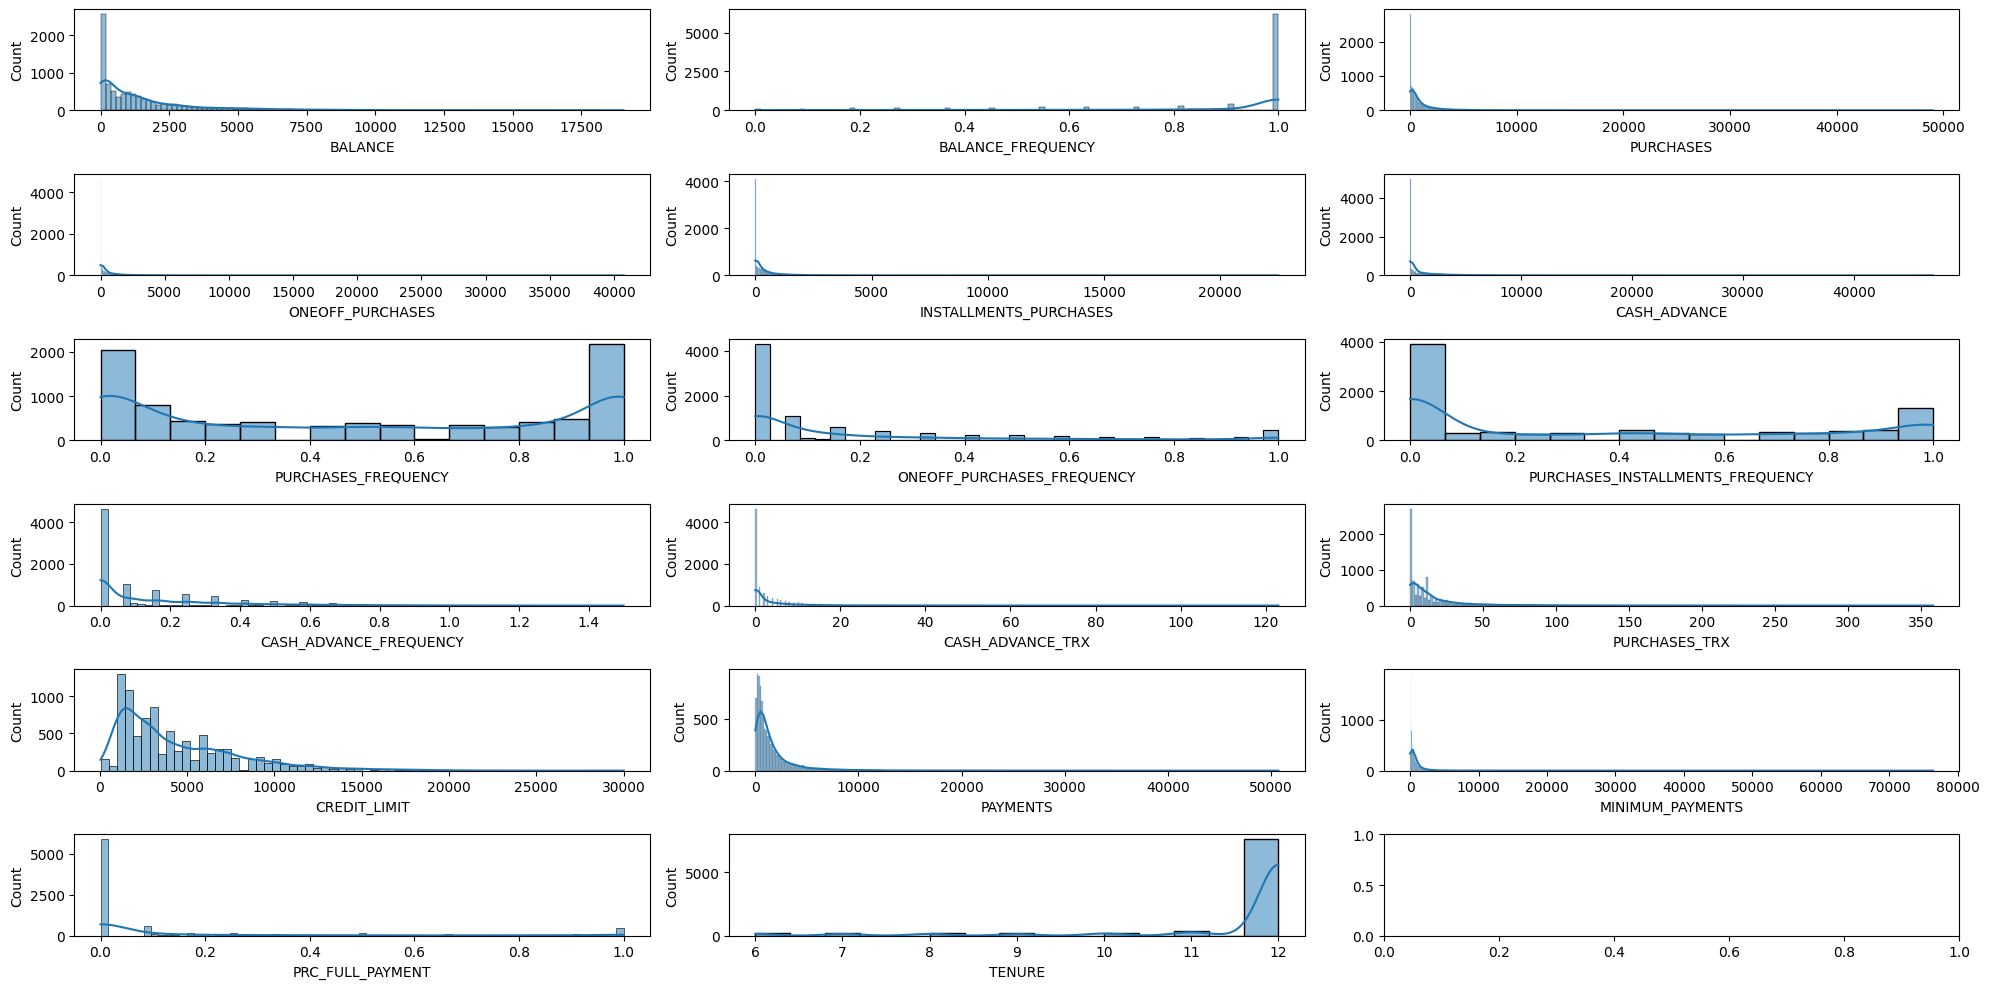

In [198]:
## EDA
plot_cols = df.columns[1:] #18

fig, axes = plt.subplots(6,3, figsize = (20, 10))

for i, axes in enumerate(axes.flat[: len(plot_cols)]) :
  col_i = df[plot_cols].columns[i]

  sns.histplot(df[col_i], kde = True, ax = axes)

plt.tight_layout()
plt.show()

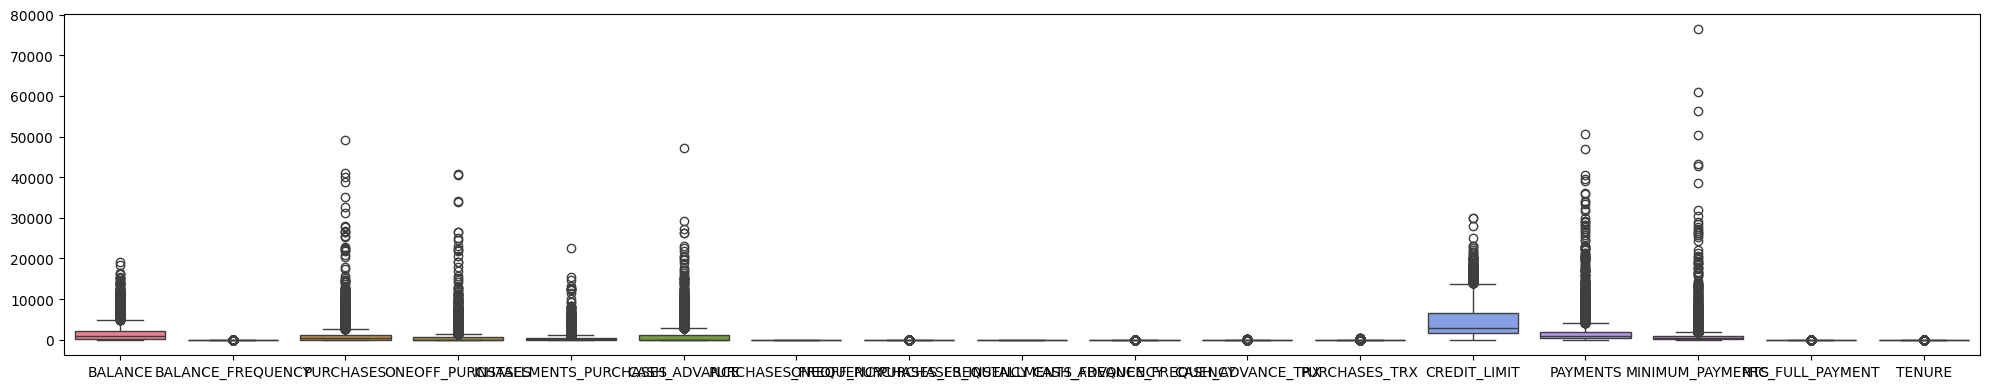

In [180]:
## Ïù¥ÏÉÅÏπò ÌôïÏù∏
plt.figure(figsize = (20, 4))
sns.boxplot(df[plot_cols])
plt.tight_layout()
plt.show()

In [199]:
# Ïù¥ÏÉÅÏπò Cliiping

def outlier(df) :
  num_cols = df.select_dtypes(exclude = 'object').columns
  df2 = df.copy()

  for col in num_cols :
    q1 =  df[col].quantile(0.25)
    q3 =  df[col].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - iqr * 1.5
    upper = q3 + iqr * 1.5

    df2[col] = df[col].clip(lower = lower, upper = upper)
  return df2

df2 = outlier(df)

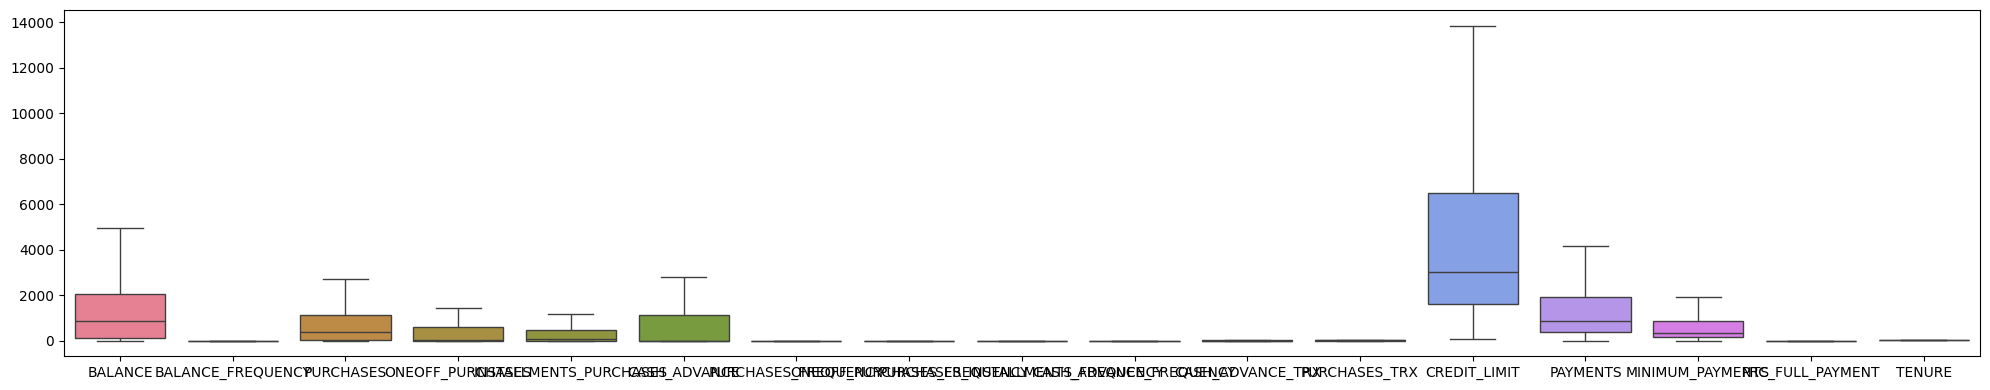

In [200]:
## Ïù¥ÏÉÅÏπò ÌôïÏù∏
plt.figure(figsize = (20, 4))
sns.boxplot(df2[plot_cols])
plt.tight_layout()
plt.show()

#### ‚úÖ 2.2 PCA

0        1        2        3         4         5         6   \
Ratio   0.2729  0.20302  0.08792  0.07480  0.062628  0.057502  0.048872   
cumsum  0.2729  0.47592  0.56384  0.63864  0.701268  0.758770  0.807642   

              7         8         9         10        11        12        13  \
Ratio   0.042575  0.038288  0.030800  0.023719  0.017736  0.014265  0.012174   
cumsum  0.850217  0.888505  0.919305  0.943024  0.960760  0.975025  0.987199   

              14        15            16  
Ratio   0.010130  0.002670  6.852235e-07  
cumsum  0.997329  0.999999  1.000000e+00

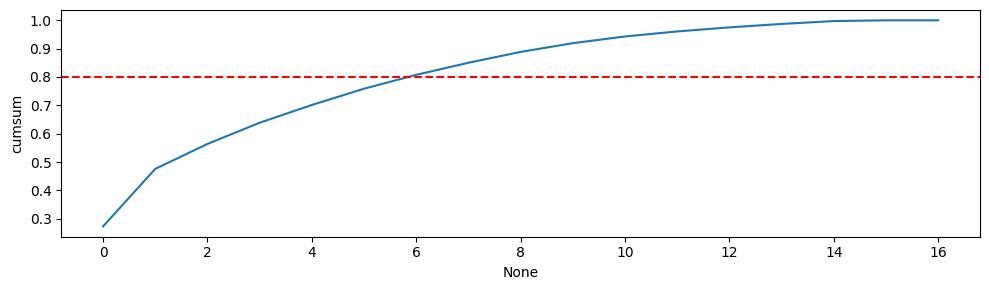


PCA Î∂ÑÏÑù Í≤∞Í≥º 6-7Í∞úÏùò Ï£ºÏÑ±Î∂ÑÏù¥ Îç∞Ïù¥ÌÑ∞Ïùò 85%ÍπåÏßÄ ÏÑ§Î™ÖÏùÑ ÌïúÎã§. PCAÎ•º ÌÜµÌï¥ Ï£ºÏÑ±Î∂ÑÏùÑ ÌÜµÌï¥ Îã§Ï§ë Í≥µÏÑ†ÏÑ±Í≥º Î≥ÄÏàòÏùò 
Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏïÑ Î≥ÄÏàò Í∞Ñ ÎèÖÎ¶ΩÏÑ± Í∞ÄÏ†ïÏù¥ Í∫†ÏßÄÎäî Î¨∏Ï†úÎ•º Ìï¥Í≤∞Ìï† Ïàò ÏûàÏùÑ Í≤ÉÏù¥ÎùºÍ≥† Î≥¥Ïó¨ÏßÑÎã§. 




In [211]:
df2 = df.drop(columns = 'CUST_ID', axis = 1)

from sklearn.preprocessing  import StandardScaler
from sklearn.decomposition import PCA

ss = pd.DataFrame(StandardScaler().fit_transform(df2), columns = df2.columns)

pca = PCA()
pca.fit(ss)

pca_res_df = pd.DataFrame({
    'Ratio' : pca.explained_variance_ratio_,
    'cumsum' :  pca.explained_variance_ratio_.cumsum()
})

display(pca_res_df.T)

plt.figure(figsize = (10, 3))
sns.lineplot(x= pca_res_df.index, y= pca_res_df['cumsum'])
plt.axhline(0.8, color ='red', linestyle = '--')

plt.tight_layout()
plt.show()

print('''
PCA Î∂ÑÏÑù Í≤∞Í≥º 6-7Í∞úÏùò Ï£ºÏÑ±Î∂ÑÏù¥ Îç∞Ïù¥ÌÑ∞Ïùò 85%ÍπåÏßÄ ÏÑ§Î™ÖÏùÑ ÌïúÎã§. PCAÎ•º ÌÜµÌï¥ Ï£ºÏÑ±Î∂ÑÏùÑ ÌÜµÌï¥ Îã§Ï§ë Í≥µÏÑ†ÏÑ±Í≥º Î≥ÄÏàòÏùò
Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏïÑ Î≥ÄÏàò Í∞Ñ ÎèÖÎ¶ΩÏÑ± Í∞ÄÏ†ïÏù¥ Í∫†ÏßÄÎäî Î¨∏Ï†úÎ•º Ìï¥Í≤∞Ìï† Ïàò ÏûàÏùÑ Í≤ÉÏù¥ÎùºÍ≥† Î≥¥Ïó¨ÏßÑÎã§.

''')

#### ‚úÖ 2.3 Cluster

Text(0.5, 1.0, 'Silhouette_Score')

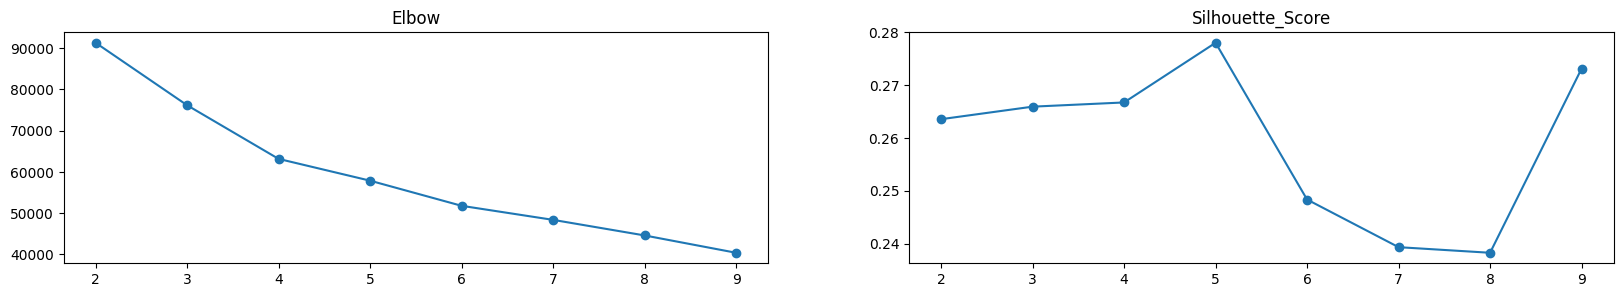

In [226]:
pca = PCA(n_components= 6)
pca_6 = pd.DataFrame(pca.fit_transform(ss) , columns = ['PC_' + str(x) for x in range(6)])


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


elbow = []
sil = []
for k in range(2, 10) :
  km = KMeans(k)
  km.fit(pca_6)
  label = km.predict(pca_6)
  elbow.append(km.inertia_)
  sil.append(silhouette_score(pca_6, km.labels_))


# Elbow
fig, axes = plt.subplots(1, 2, figsize = (20, 3))

axes[0].plot(range(2, 10), elbow, marker='o')
axes[0].set_title('Elbow')

axes[1].plot(range(2, 10), sil, marker='o')
axes[1].set_title('Silhouette_Score')

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

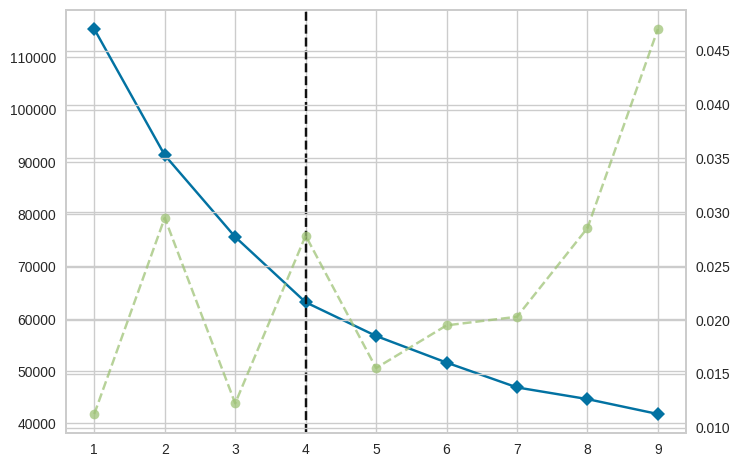

In [228]:
from yellowbrick.cluster import KElbowVisualizer
kmean = KMeans()
plot = KElbowVisualizer(kmean, k = (1, 10))
plot.fit(pca_6)

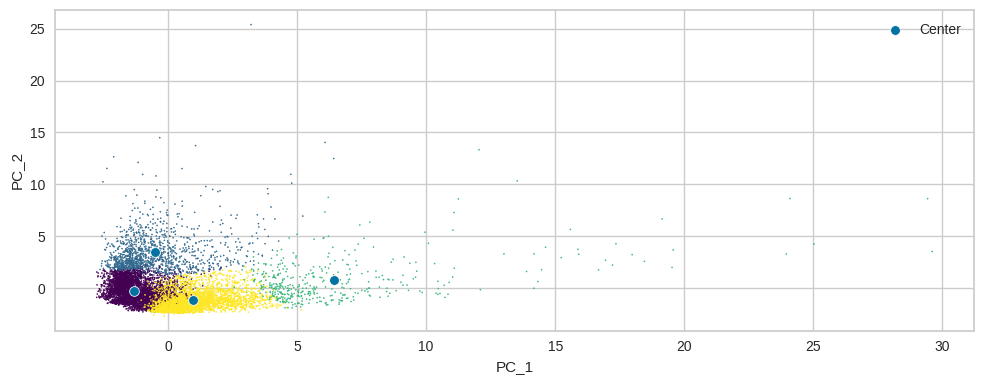

In [240]:
#ÏùëÏßëÎèÑÏôÄ Î∂ÑÎ¶¨ÎèÑÎ•º Í∏∞Î∞òÏúºÎ°ú Ï†ÅÏ†à ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïà´ÏûêÎ•º Íµ¨ÌïòÍ≥† ÎëêÍ∞úÏùò Ï£ºÏÑ±Î∂Ñ Ï∞®ÏõêÏóê Íµ∞Ïßë Ï§ëÏã¨ÏùÑ Ìè¨Ìï®ÌïòÏó¨ ÏãúÍ∞ÅÌôî
km_4 = KMeans(n_clusters= 4, random_state= 34)
km_4.fit(pca_6)
km_label = km_4.predict(pca_6 )
pca_6['Label'] = km_label


plt.figure(figsize = (10,4))
# Ï£ºÏÑ±Î∂Ñ Îç∞Ïù¥ÌÑ∞Ïóê Label Î∂ÑÌè¨ÎèÑ
plt.scatter(pca_6['PC_0'] , pca_6['PC_1'], c = pca_6['Label'], cmap = 'viridis', s = 0.7)

# Í∞Å ClusterÏùò Ï§ëÏã¨ Î∂ÄÎ∂Ñ ÌëúÏãú
sns.scatterplot(x = km_4.cluster_centers_[:,0],y =km_4.cluster_centers_[:,1],label='Center')
plt.xlabel('PC_1')
plt.ylabel('PC_2')

plt.tight_layout()
plt.show()

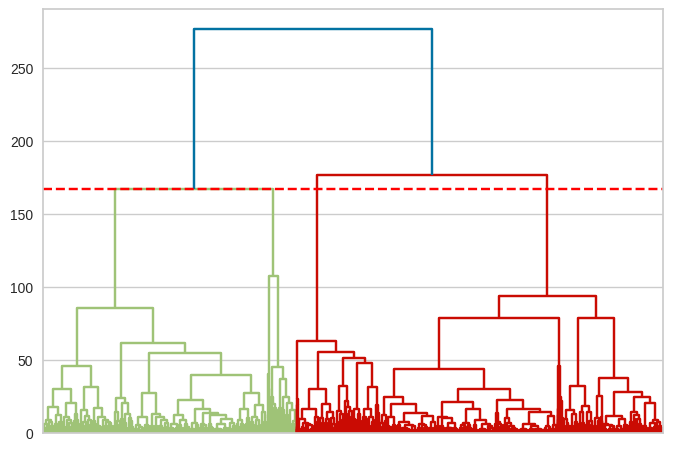

In [242]:
from scipy.cluster.hierarchy import dendrogram, linkage

lnk = linkage(pca_6, 'ward')
dend = dendrogram(lnk)
# KMeansÏóêÏÑú k=4Í∞Ä Ï†ÅÏ†àÌïòÎã§Í≥† ÌåêÎã®ÌñàÏùÑ Í≤ΩÏö∞, 4Í∞úÏùò Íµ∞ÏßëÏù¥ ÏÉùÍ∏∞Îäî **Í±∞Î¶¨ ÏûÑÍ≥ÑÍ∞í(threshold)**
n_cluster = 4
# ÎßàÏßÄÎßâÏóêÏÑú 3Î≤àÏß∏ Í±∞Î¶¨ ‚Üí 4Í∞ú Íµ∞ÏßëÏù¥ ÎßåÎì§Ïñ¥ÏßÄÎäî ÏàúÍ∞Ñ
threshold = lnk[-(n_cluster -1), 2]

plt.axhline(y=threshold, color='red', linestyle='--', label=f"{n_cluster} clusters cutoff")
plt.xticks([])
plt.show()

#### üìå ÌÜµÍ≥ÑÎ¨∏Ï†ú
##### ‚úÖ  1. Ïñ¥Îäê ÏûêÎèôÏ∞® ÌöåÏÇ¨Ïùò Î≥∏ÏÇ¨ÏóêÏÑú Ïó¨Îü¨ ÏßÄÎ∞© ÏòÅÏóÖÏÜåÏóê ÎÇ¥Î†§Î≥¥ÎÇ∏ 43ÎåÄÏùò ÏÉà Ï∞® Ï§ë 11ÎåÄÏóê Î∂àÎüâ Ïò§ÎîîÏò§Í∞Ä ÏÑ§ÏπòÎêòÏóàÎã§Í≥† ÌïúÎã§. Ïñ¥Îäê ÏòÅÏóÖÏÜåÍ∞Ä 8ÎåÄÎ•º Ïù∏ÏàòÌïòÏòÄÎäîÎç∞ Ïù¥ Ï§ëÏóêÏÑú Ïò§ÎîîÏò§Í∞Ä Î∂àÎüâÏù∏ Ï∞®Í∞Ä Ï†ÅÏñ¥ÎèÑ 2ÎåÄ Ïù¥ÏÉÅÏù¥ Îê† ÌôïÎ•†

In [243]:
from scipy.stats import hypergeom

rv = hypergeom(43, 11, 8)
# Ï†ÅÏñ¥ÎèÑ 2ÎåÄ Ïù¥ÏÉÅ 1- P(X = 1)
1 - rv.cdf(1)

np.float64(0.6721384488647228)

##### ‚úÖ  2. ÏÑºÏÑú Îç∞Ïù¥ÌÑ∞
      * Î≥ÄÏàòÎì§Ïùò Îã§Ï§ëÍ≥µÏÑ†ÏÑ±ÏùÑ Í≤ÄÌÜ†
      * Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌïú Î∞©Î≤ï 2Í∞ÄÏßÄÎ•º Ï†úÏãúÌïòÍ≥†, ÌïòÎÇòÎ•º ÏÑ†ÌÉùÌïòÏó¨ Ï†ÅÏö©
      * 2-2Ïùò Î∞©Î≤ïÏùÑ Ï†Ñ,ÌõÑÏùò ÌöåÍ∑Ä Î∂ÑÏÑù Î™®Îç∏Ïùò Í≤∞Í≥ºÎ•º ÎπÑÍµê

In [259]:
df = pd.read_csv('/content/drive/MyDrive/ADP_SONY/ADP_SET_1/data/stats_reg1.csv')
df.head()

target = df.drop(columns = 'Target', axis = 1)

col1  col2      corr
12    F_1  F_13  0.840241
74    F_5  F_15  0.707201
161  F_11  F_12  0.955086
175  F_12  F_11  0.955086
180  F_13   F_1  0.840241
214  F_15   F_5  0.707201

<Axes: >

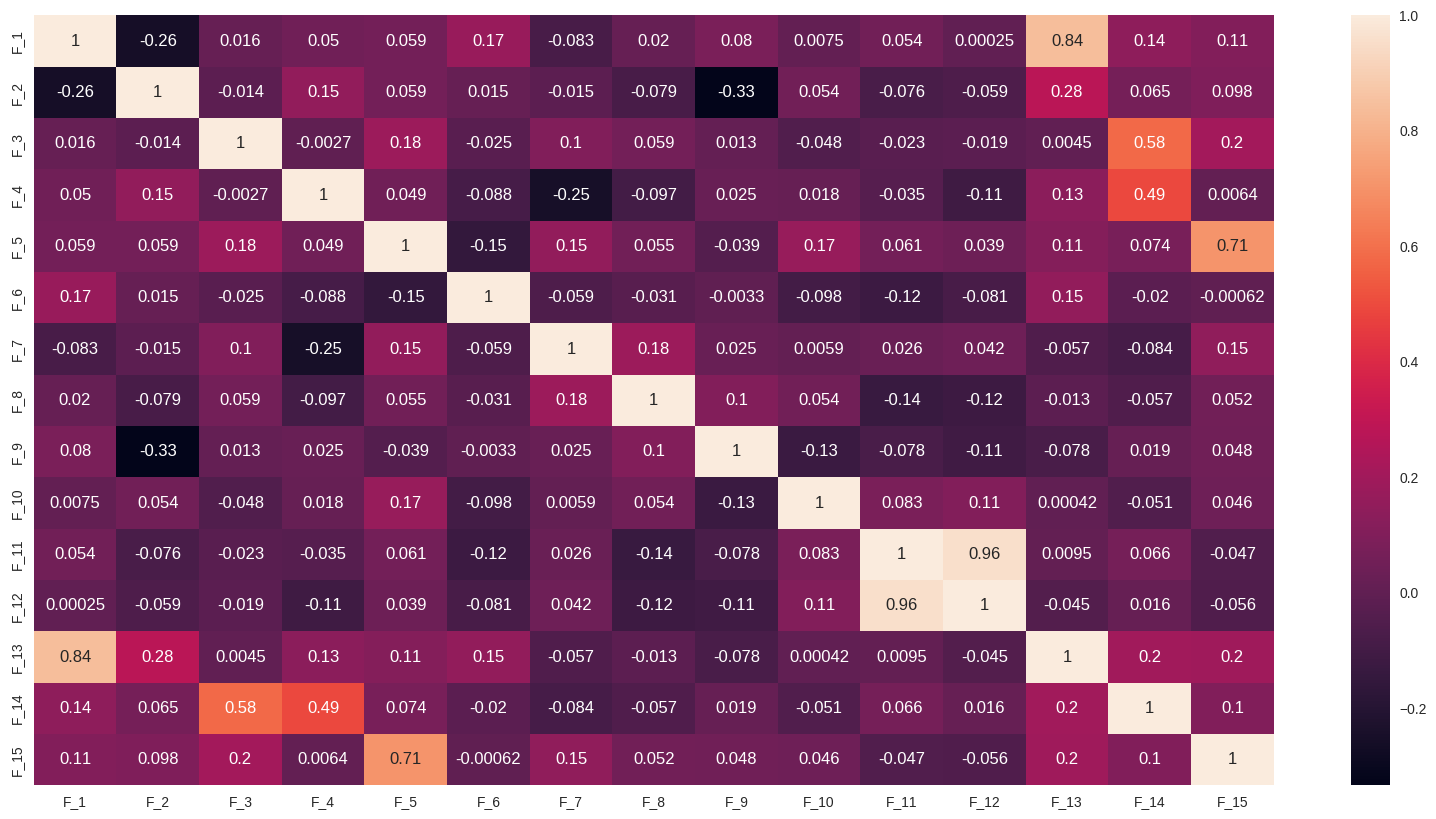

In [268]:
#1 ) ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
cor_mat = target.corr()
cor_mat_unstack = cor_mat.unstack().reset_index()
cor_mat_unstack.columns = ['col1','col2','corr']

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ 0.7 Ïù¥ÏÉÅ
display(cor_mat_unstack[(cor_mat_unstack['col1'] != cor_mat_unstack['col2']) & (np.abs(cor_mat_unstack['corr']) >= 0.7)].drop_duplicates(keep = 'first') )

plt.figure(figsize = (20, 10))
sns.heatmap(cor_mat, annot= True)

In [264]:
#2 ) Îã§Ï§ë Í≥µÏÑ†ÏÑ±
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Variable'] = target.columns

vif['VIF'] = [variance_inflation_factor(target.values, i) for i in range(target.shape[1])]
vif.sort_values('VIF', ascending= False)

Variable         VIF
11     F_12  141.201961
10     F_11  139.715210
12     F_13   46.388666
0       F_1   44.238222
1       F_2   14.524559
9      F_10    5.828291
13     F_14    2.840278
14     F_15    2.294972
4       F_5    2.195660
2       F_3    2.101471
3       F_4    1.859888
6       F_7    1.200195
8       F_9    1.190482
5       F_6    1.142734
7       F_8    1.089550

In [274]:
# Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌïú Î∞©Î≤ï 2Í∞ÄÏßÄÎ•º Ï†úÏãúÌïòÍ≥†, ÌïòÎÇòÎ•º ÏÑ†ÌÉùÌïòÏó¨ Ï†ÅÏö© - Ïª¨Îüº ÏÇ≠Ï†ú ÌòπÏùÄ PCA
drop_df = target.drop(columns = ['F_12','F_11', 'F_13','F_1', 'F_2'], axis = 1)

ss = StandardScaler()
drop_scaled_df = pd.DataFrame(ss.fit_transform(drop_df) , columns = drop_df.columns)

vif = pd.DataFrame()
vif['Variable'] = drop_scaled_df.columns

vif['VIF'] = [variance_inflation_factor(drop_scaled_df.values, i) for i in range(drop_scaled_df.shape[1])]
display(vif.sort_values('VIF', ascending= False))

Variable       VIF
8     F_14  2.412900
2      F_5  2.219388
9     F_15  2.118694
0      F_3  1.897007
1      F_4  1.685568
4      F_7  1.141447
7     F_10  1.070048
3      F_6  1.065946
5      F_8  1.060263
6      F_9  1.042023

In [281]:
# 2-2Ïùò Î∞©Î≤ïÏùÑ Ï†Ñ,ÌõÑÏùò ÌöåÍ∑Ä Î∂ÑÏÑù Î™®Îç∏Ïùò Í≤∞Í≥ºÎ•º ÎπÑÍµê
# Ï†Ñ
import statsmodels.api as sm

X = target.copy()
y = df['Target']
add_x = sm.add_constant(X)
model = sm.OLS(y, add_x).fit()
print(model.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0314      0.039      0.814      0.418      -0.045       0.108
F_1           61.6675      0.064    957.009      0.000      61.539      61.796
F_2           28.6933      0.035    825.633      0.000      28.624      28.762
F_3           50.7597      0.015   3371.303      0.000      50.730      50.790
F_4           63.1688      0.013   5010.118      0.000      63.144      63.194
F_5           83.1993      0.012   7090.507      0.000      83.176      83.223
F_6           16.0561      0.011   1471.039      0.000      16.034      16.078
F_7            0.6330      0.010     65.170      0.000       0.614       0.652
F_8           98.1078      0.010   9903.423      0.000      98.088      98.127
F_9           81.7976      0.009   8905.585      0.000      81.779      81.816
F_10           0.0016      0.013      0.123      0.9

In [282]:
X2 = drop_scaled_df.copy()
y = df['Target']
add_x2 = sm.add_constant(X2)
model = sm.OLS(y, add_x2).fit()
print(model.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9706      5.697      1.926      0.057      -0.349      22.290
F_3           34.8221      7.847      4.438      0.000      19.231      50.413
F_4           61.0852      7.396      8.259      0.000      46.389      75.782
F_5           95.3672      8.487     11.237      0.000      78.503     112.231
F_6           24.6646      5.882      4.193      0.000      12.977      36.352
F_7           -3.3873      6.087     -0.557      0.579     -15.481       8.707
F_8           93.2447      5.866     15.895      0.000      81.589     104.901
F_9           81.7433      5.816     14.056      0.000      70.188      93.299
F_10           2.0532      5.893      0.348      0.728      -9.656      13.763
F_14          14.1844      8.850      1.603      0.113      -3.399      31.768
F_15           9.6821      8.292      1.168      0.2

##### ‚úÖ  3. Ï†ïÍ∑úÏÑ±, Îì±Î∂ÑÏÇ∞

In [283]:
df = pd.read_csv('/content/drive/MyDrive/ADP_SONY/ADP_SET_1/data/learn.csv')
df.head()


Student  Lecture  Online  Blended
0        1      8.7    67.8     74.2
1        2     18.2    97.2     76.5
2        3      7.5    74.8     69.1
3        4     39.7    62.3     68.4
4        5     73.4    84.9     84.5

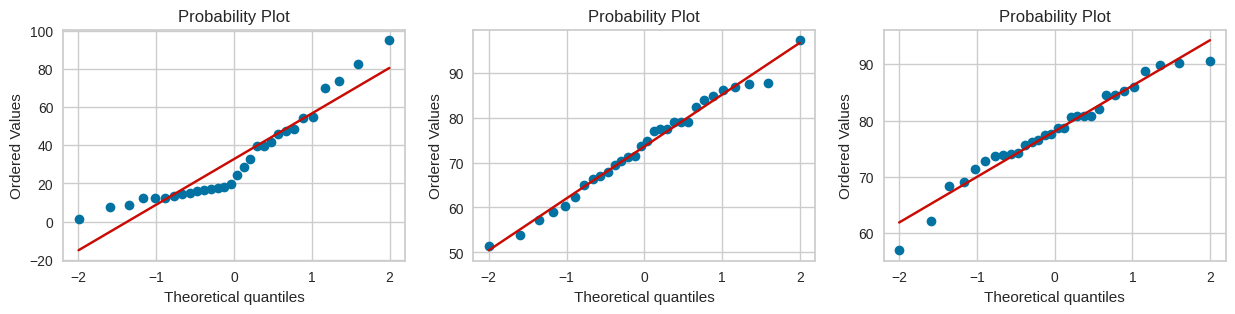

Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï

Í∑ÄÎ¨¥Í∞ÄÏÑ§ : Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§.
ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : Ï†ïÍ∑úÎ∂ÑÌè¨Í∞Ä ÏïÑÎãàÎã§. 
   Columns  Shapiro_P_value
0  Lecture         0.004650
1   Online         0.909854
2  Blended         0.363978
onlineÍ≥º Blended Îç∞Ïù¥ÌÑ∞Îßå Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§. 

Îì±Î∂ÑÏÇ∞ Í≤ÄÏ†ï

Í∑ÄÎ¨¥Í∞ÄÏÑ§ :ÏÑ∏ Í∑∏Î£πÏùÄ ÎèôÏùºÌïú Î∂ÑÏÇ∞ÏùÑ Í∞ÄÏßÑÎã§
ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : ÏÑ∏ Í∑∏Î£π Ï§ë Ï†ÅÏñ¥ÎèÑ ÌïòÎÇòÎäî Î∂ÑÏÇ∞Ïù¥ Îã§Î•¥Îã§. 
5.894135513581264e-05 ÏÑ∏ Í∑∏Î£π Ï§ë Ï†ÅÏñ¥ÎèÑ ÌïòÎÇòÎäî Î∂ÑÏÇ∞Ïù¥ Îã§Î•¥Îã§.. 


In [317]:
# 3Í∞ÄÏßÄ Î∞©Ïãù Í∞ÅÍ∞Å Ï†êÏàò Î∂ÑÌè¨Í∞Ä Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÎäîÏßÄÏôÄ Î∞©ÏãùÎì§Í∞ÑÏùò Î∂ÑÏÇ∞ÏùÄ ÎèôÏùºÌïúÏßÄ Í≤ÄÏ†ï

from scipy.stats import shapiro, levene
import scipy.stats as stats

s_df = df.iloc[:,1:]

s_lst = []
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

for i ,col in enumerate(s_df.columns.unique()):
  stat, p_val = shapiro(s_df[col])
  s_lst.append([col, p_val])
  stats.probplot(s_df[col], dist='norm', plot=axes[i])


plt.show()

shapi = pd.DataFrame(s_lst , columns = ['Columns','Shapiro_P_value'])
print('Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï')
print(f'''
Í∑ÄÎ¨¥Í∞ÄÏÑ§ : Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§.
ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : Ï†ïÍ∑úÎ∂ÑÌè¨Í∞Ä ÏïÑÎãàÎã§.
{shapi}
onlineÍ≥º Blended Îç∞Ïù¥ÌÑ∞Îßå Ï†ïÍ∑úÎ∂ÑÌè¨Ïù¥Îã§. ''' )



stat, p_val = levene(s_df['Lecture'], s_df['Online'], s_df['Blended'])
print('')
print('Îì±Î∂ÑÏÇ∞ Í≤ÄÏ†ï')
print(f'''
Í∑ÄÎ¨¥Í∞ÄÏÑ§ :ÏÑ∏ Í∑∏Î£πÏùÄ ÎèôÏùºÌïú Î∂ÑÏÇ∞ÏùÑ Í∞ÄÏßÑÎã§
ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : ÏÑ∏ Í∑∏Î£π Ï§ë Ï†ÅÏñ¥ÎèÑ ÌïòÎÇòÎäî Î∂ÑÏÇ∞Ïù¥ Îã§Î•¥Îã§.
{p_val} ÏÑ∏ Í∑∏Î£π Ï§ë Ï†ÅÏñ¥ÎèÑ ÌïòÎÇòÎäî Î∂ÑÏÇ∞Ïù¥ Îã§Î•¥Îã§.. ''' )

| Ìï≠Î™©                    | Kruskal-Wallis                             | Friedman                                         |
|-------------------------|--------------------------------------------|--------------------------------------------------|
| **Í≤ÄÏ†ï ÎåÄÏÉÅ**           | ÎèÖÎ¶ΩÎêú Í∑∏Î£π Í∞Ñ Ï∞®Ïù¥ Í≤ÄÏ†ï                   | Î∞òÎ≥µ Ï∏°Ï†ïÎêú Í∑∏Î£π Í∞Ñ Ï∞®Ïù¥ Í≤ÄÏ†ï                    |
| **Ïú†ÏÇ¨Ìïú Î™®Ïàò Î∂ÑÏÑùÎ≤ï**  | ÏùºÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù (One-way ANOVA)               | Î∞òÎ≥µÏ∏°Ï†ïÎ∂ÑÏÇ∞Î∂ÑÏÑù (Repeated Measures ANOVA)       |
| **ÏÉòÌîå Í∞Ñ Í¥ÄÍ≥Ñ**        | ÎèÖÎ¶Ω (Independent samples)                 | Í¥ÄÎ†® ÏûàÏùå (Repeated measures, ÎèôÏùº ÎåÄÏÉÅ Î∞òÎ≥µ Ï∏°Ï†ï) |
| **Ï†ÅÏö© ÏòàÏãú**           | ÏÑúÎ°ú Îã§Î•∏ ÌïôÏÉù Í∑∏Î£π Í∞Ñ ÏÑ±Ï†Å ÎπÑÍµê           | Í∞ôÏùÄ ÌïôÏÉùÏóêÍ≤å 3Í∞ÄÏßÄ ÏàòÏóÖ Î∞©Ïãù Ï†ÅÏö© ÌõÑ ÏÑ±Ï†Å ÎπÑÍµê  |
| **Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú**         | Í∏¥ ÌòïÏãù (long) ÎòêÎäî ÎÑìÏùÄ ÌòïÏãù (wide) Î™®Îëê Í∞ÄÎä• | ÎÑìÏùÄ ÌòïÏãù (wide format) ÏÑ†Ìò∏ (`pandas.DataFrame`) |


In [321]:
# ÎπÑÎ™®Ïàò Í≤ÄÏ†ï - 3Í∞úÏùò ÎèÖÎ¶ΩÎêú Í∑∏Î£π - ÌîÑÎ¶¨ÎìúÎßå
# Krusal L Ï§ëÏïôÍ∞í Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄÎ•º Í≤ÄÏ†ï

from scipy.stats import friedmanchisquare

stat, p = friedmanchisquare(
    df['Lecture'],
    df['Online'],
    df['Blended']
)

print(f"Friedman Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ: {stat:.4f}, p-value: {p:.4f}")
print('''
Í∑ÄÎ¨¥Í∞ÄÏÑ§ : 3 Í∞ÄÏßÄ Î∞©Î≤ï Í∞ÑÏùò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§
ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : 3 Í∞ÄÏßÄ Î∞©Î≤ï Í∞ÑÏùò Ï∞®Ïù¥Í∞Ä ÏûàÎã§.
p_value 0.000 < 0.05 ÏúºÎ°ú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÏó¨, 3 Í∞ÄÏßÄ Î∞©Î≤ï Í∞ÑÏùò Ï∞®Ïù¥Í∞Ä ÏûàÎã§

''')

Friedman Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ: 33.8000, p-value: 0.0000

Í∑ÄÎ¨¥Í∞ÄÏÑ§ : 3 Í∞ÄÏßÄ Î∞©Î≤ï Í∞ÑÏùò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§
ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : 3 Í∞ÄÏßÄ Î∞©Î≤ï Í∞ÑÏùò Ï∞®Ïù¥Í∞Ä ÏûàÎã§. 
p_value 0.000 < 0.05 ÏúºÎ°ú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÏó¨, 3 Í∞ÄÏßÄ Î∞©Î≤ï Í∞ÑÏùò Ï∞®Ïù¥Í∞Ä ÏûàÎã§




In [320]:
from scipy.stats import kruskal

stat, p = kruskal(
    df['Lecture'],
    df['Online'],
    df['Blended']
)

print(f"Kruskal-Wallis Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ: {stat:.4f}, p-value: {p:.4f}")

Kruskal-Wallis Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ: 43.4142, p-value: 0.0000
